<a href="https://colab.research.google.com/github/castrokelly/42sp/blob/main/web_connectivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import json

caminho_do_arquivo = '/content/web_connectivity.json'

# Inicializar uma lista para armazenar os dados
dados = []

# Abrir e ler o arquivo JSON
with open(caminho_do_arquivo, 'r') as arquivo:
    for linha in arquivo:
        try:
            objeto_json = json.loads(linha)
            dados.append(objeto_json)
        except json.JSONDecodeError:
            pass  # Ou tratar o erro conforme necessário

# Amostra dos dados
print(json.dumps(dados[0], indent=4))


{
    "resolver_network_name": "",
    "software_name": "ooniprobe-android",
    "software_version": "2.5.2",
    "test_runtime": 3.0265769958496094,
    "test_start_time": "2020-10-15 04:40:24",
    "resolver_asn": "",
    "probe_network_name": "",
    "test_keys": {
        "accessible": true,
        "control": {
            "tcp_connect": {
                "192.0.66.2:443": {
                    "status": true,
                    "failure": null
                }
            },
            "http_request": {
                "body_length": 192030,
                "failure": null,
                "title": "Brookings - Quality. Independence. Impact.",
                "status_code": 200,
                "headers": {
                    "X-rq": "ams2 88 83 3111",
                    "X-Cache": "miss",
                    "X-Powered-By": "WordPress VIP <https://wpvip.com>",
                    "Accept-Ranges": "bytes",
                    "Vary": "Accept-Encoding",
                    "S

In [9]:
# Listar as chaves do primeiro objeto JSON para entender as colunas
chaves = list(dados[0].keys())

print("Chaves/Colunas encontradas no JSON:", chaves)


Chaves/Colunas encontradas no JSON: ['resolver_network_name', 'software_name', 'software_version', 'test_runtime', 'test_start_time', 'resolver_asn', 'probe_network_name', 'test_keys', 'id', 'data_format_version', 'measurement_start_time', 'test_version', 'test_name', 'resolver_ip', 'input', 'probe_ip', 'report_id', 'probe_asn', 'annotations', 'test_helpers', 'probe_cc']


##Contar o número de testes por status de bloqueio:</br>
Para entender a distribuição de testes bem-sucedidos versus bloqueados, podemos analisar os valores dentro da chave `test_keys` que contém detalhes sobre o resultado do teste.

In [10]:
from collections import Counter

status_testes = [d['test_keys']['blocking'] for d in dados if 'blocking' in d['test_keys']]
contagem_status = Counter(status_testes)

print(contagem_status)


Counter({False: 2})



##Analisar a distribuição de testes por país:</br>

Se o conjunto de dados contiver informações geográficas, como o código do país `probe_cc`, podemos analisar a distribuição de testes por país.



In [11]:
paises_testes = [d['probe_cc'] for d in dados]
contagem_paises = Counter(paises_testes)

print(contagem_paises)


Counter({'US': 2})


##Extrair informações sobre o tempo de execução dos testes:</br>
Podemos analisar quanto tempo em média os testes levam para serem executados.

In [12]:
tempos_teste = [d['test_runtime'] for d in dados if 'test_runtime' in d]
media_tempo_teste = sum(tempos_teste) / len(tempos_teste)

print(f"Média de tempo de execução dos testes: {media_tempo_teste} segundos")

Média de tempo de execução dos testes: 5.469319939613342 segundos


##Identificar os principais domínios testados:</br>
Podemos listar os domínios mais frequentemente testados para identificar possíveis alvos de censura.

In [13]:
dominios_testados = [d['input'] for d in dados if 'input' in d]
contagem_dominios = Counter(dominios_testados)

print(contagem_dominios.most_common(10))


[('https://www.brookings.edu/', 1), ('https://www.bbc.com/news/world-51235105', 1)]


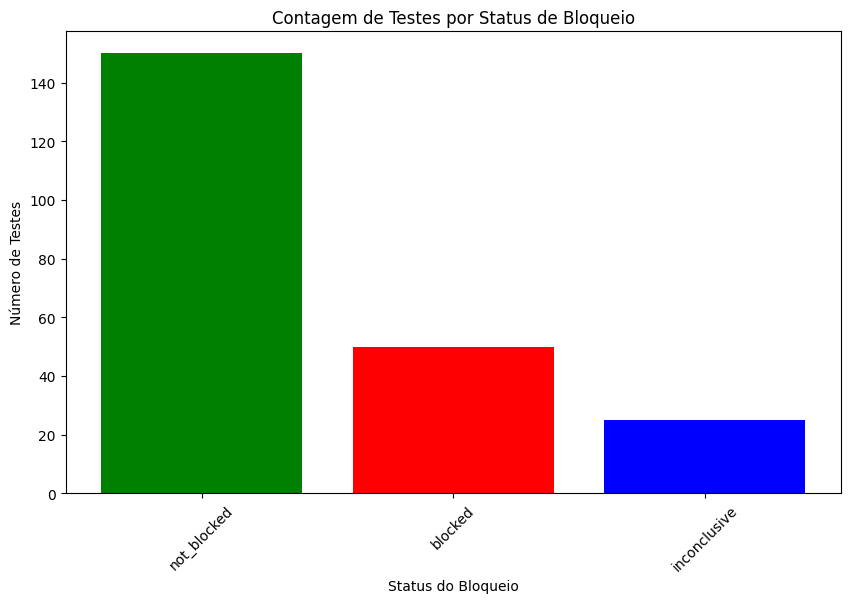

In [18]:
#Dados fictícios
contagem_status = {'not_blocked': 150, 'blocked': 50, 'inconclusive': 25}

import matplotlib.pyplot as plt

# Dados para o gráfico
status = list(contagem_status.keys())
valores = list(contagem_status.values())

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(status, valores, color=['green', 'red', 'blue'])
plt.title('Contagem de Testes por Status de Bloqueio')
plt.xlabel('Status do Bloqueio')
plt.ylabel('Número de Testes')
plt.xticks(rotation=45)
plt.show()
